In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os
from prepare import prepare_nba, nba_split

In [2]:
df = pd.read_csv("nba_stats.csv")

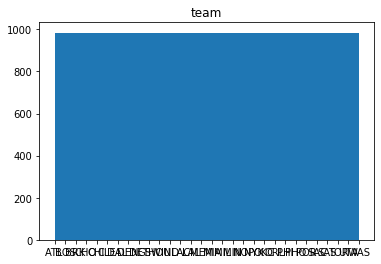

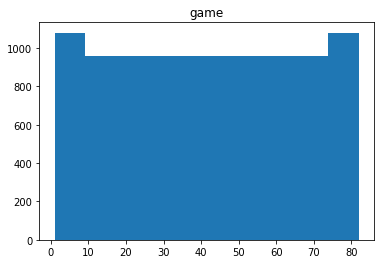

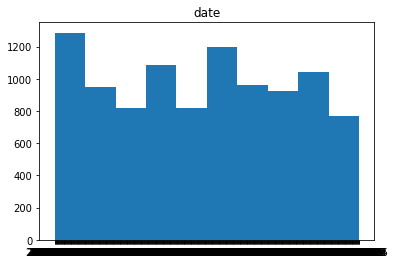

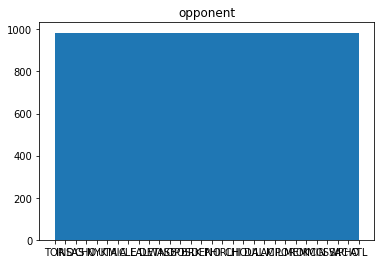

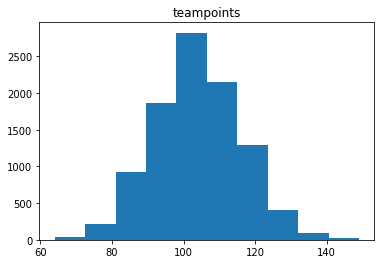

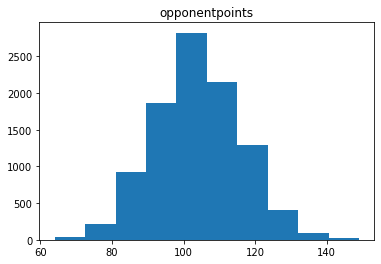

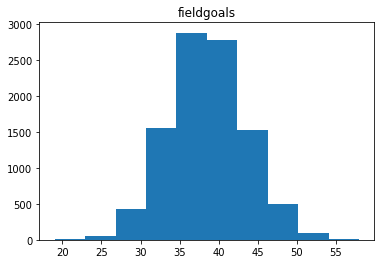

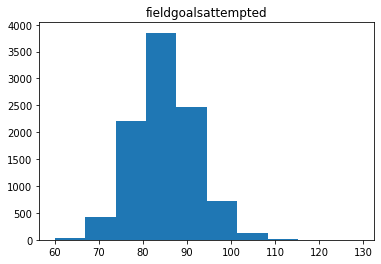

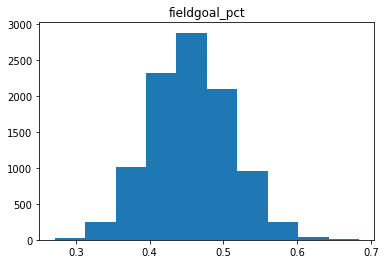

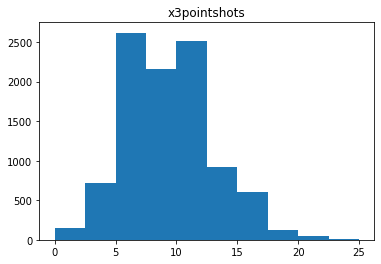

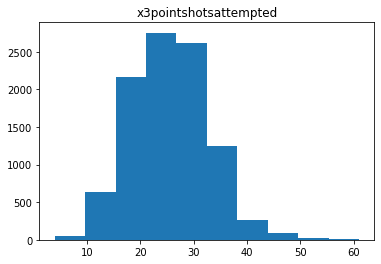

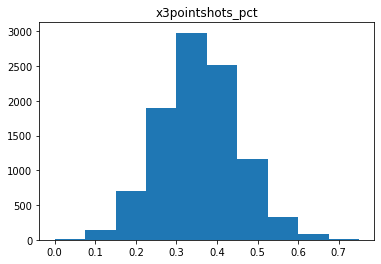

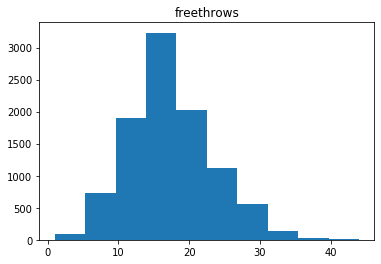

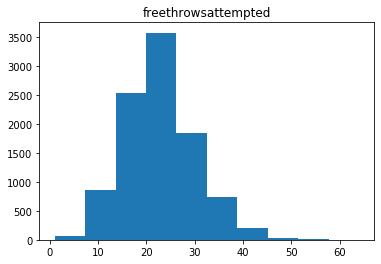

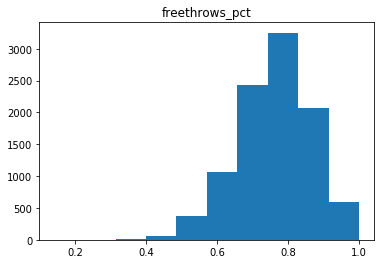

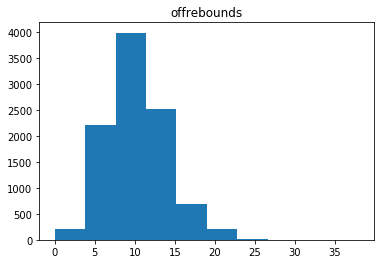

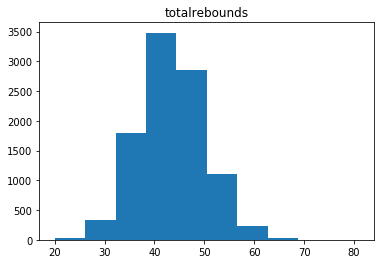

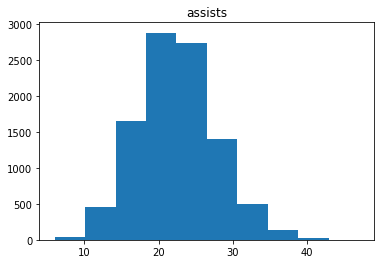

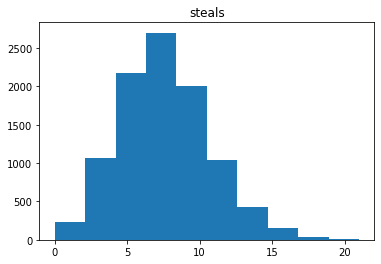

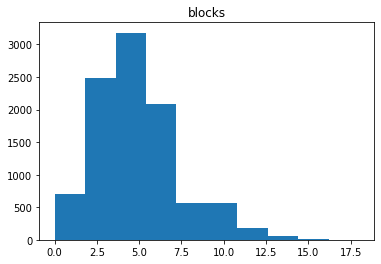

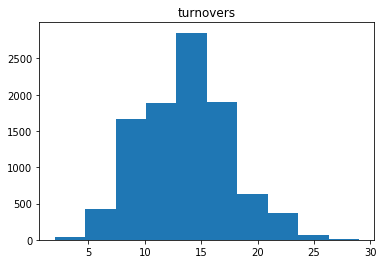

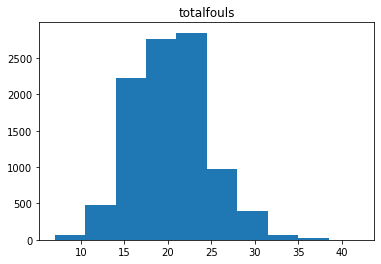

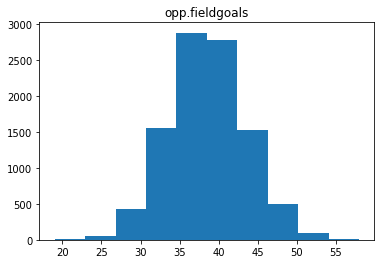

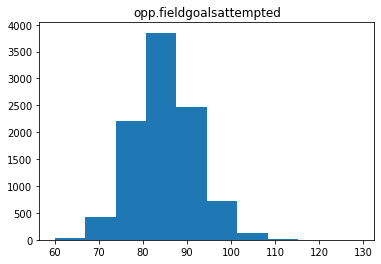

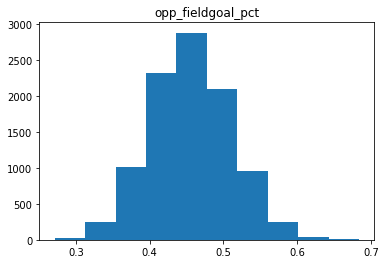

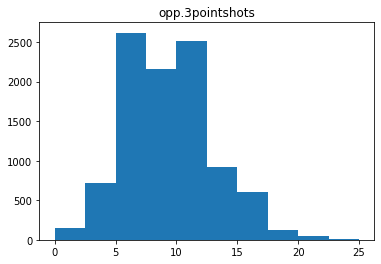

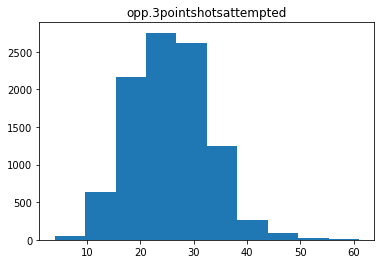

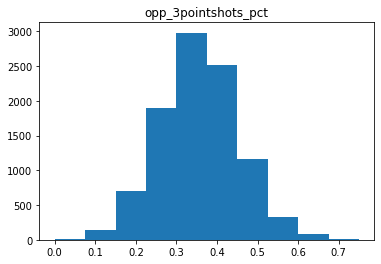

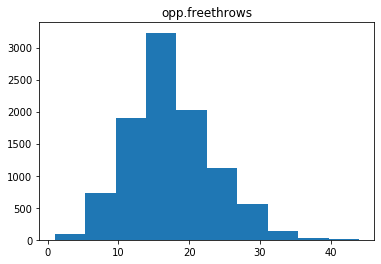

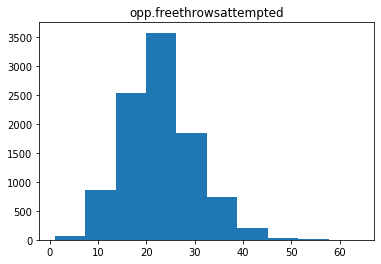

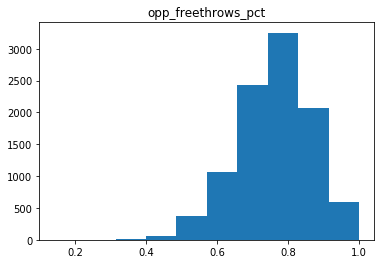

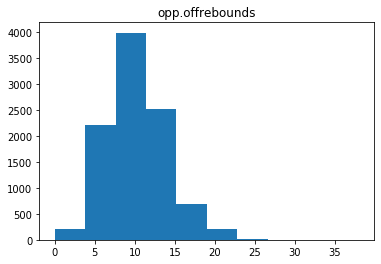

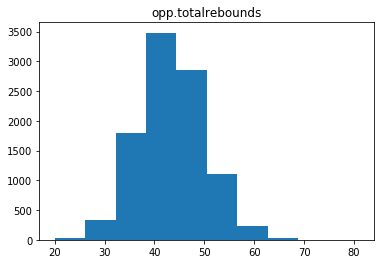

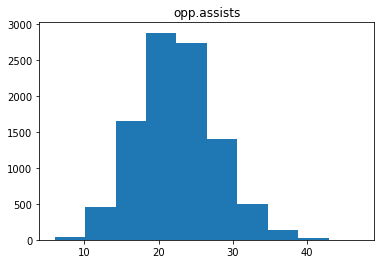

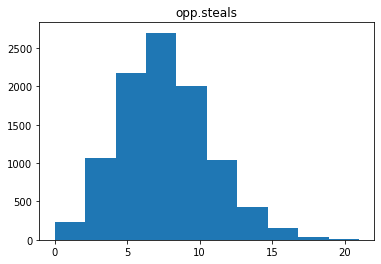

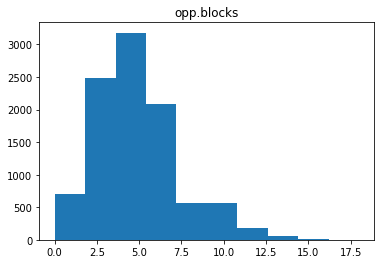

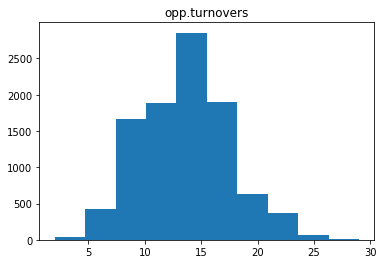

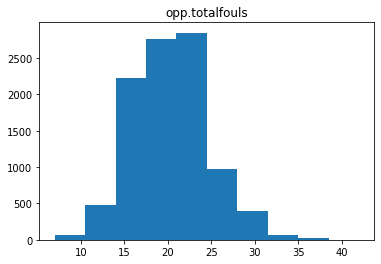

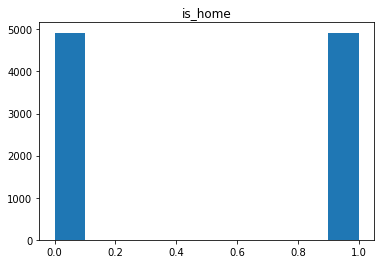

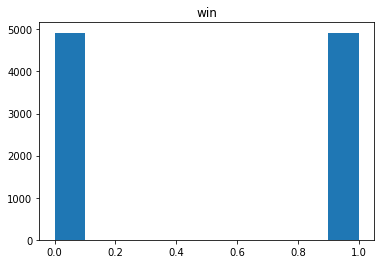

In [3]:
df = prepare_nba(df)

# Some Initial Thoughts
1. Does free throws attempted influence a win?
2. Can more rebounds influence a win?
3. Can more assist influence a win?
4. Can more blocks influence a win?

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
train, validate, test = nba_split(df)

The shape of the train data set is (5510, 40)
The shape of the validate data set is (2362, 40)
The shape of the test data set is (1968, 40)


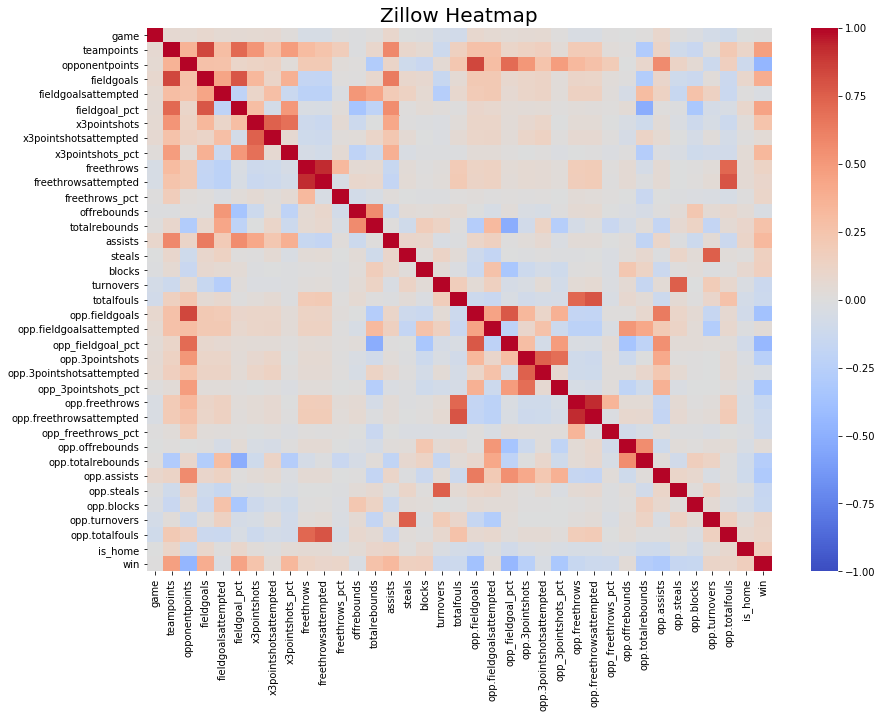

In [105]:
plt.figure(figsize=(14,10))
sns.heatmap(train.corr(),
            vmin = -1, 
            cmap='coolwarm',
           annot=False).set_title("Zillow Heatmap", fontsize=20);

In [106]:
train.corr()

,game,teampoints,opponentpoints,fieldgoals,fieldgoalsattempted,fieldgoal_pct,x3pointshots,x3pointshotsattempted,x3pointshots_pct,freethrows,...,opp_freethrows_pct,opp.offrebounds,opp.totalrebounds,opp.assists,opp.steals,opp.blocks,opp.turnovers,opp.totalfouls,is_home,win
game,1.000000,0.063615,0.062266,0.083602,0.056187,0.053454,0.059614,0.065188,0.019491,-0.047742,...,0.001227,-0.000753,0.015617,0.092370,0.001121,-0.018222,-0.074984,-0.099854,-0.006308,0.004817
teampoints,0.063615,1.000000,0.359955,0.842382,0.290337,0.715916,0.517486,0.261195,0.479659,0.307782,...,0.023883,0.012581,-0.294783,0.118153,-0.099355,-0.141265,0.023673,0.211711,0.104941,0.464463
opponentpoints,0.062266,0.359955,1.000000,0.266241,0.264015,0.105016,0.127749,0.146997,0.028565,0.209250,...,0.188241,-0.006790,0.090039,0.567365,0.120095,0.048782,-0.123505,0.161088,-0.110338,-0.453157
fieldgoals,0.083602,0.842382,0.266241,1.000000,0.441182,0.781449,0.335648,0.110334,0.370546,-0.175110,...,0.024614,0.001175,-0.280680,0.099196,-0.106245,-0.132803,0.030185,-0.126203,0.086800,0.395628
fieldgoalsattempted,0.056187,0.290337,0.264015,0.441182,1.000000,-0.210209,0.107202,0.282411,-0.134798,-0.219768,...,0.018692,-0.056606,0.300436,0.140272,-0.155039,0.261767,0.143305,-0.133783,0.006227,-0.024302
fieldgoal_pct,0.053454,0.715916,0.105016,0.781449,-0.210209,1.000000,0.290738,-0.076147,0.500506,-0.035491,...,0.012419,0.040752,-0.512166,0.008586,-0.008564,-0.323862,-0.066028,-0.042003,0.090389,0.449377
x3pointshots,0.059614,0.517486,0.127749,0.335648,0.107202,0.290738,1.000000,0.747792,0.682672,-0.112917,...,-0.002887,-0.039094,-0.103533,0.035799,-0.025877,-0.116424,-0.049716,-0.117668,0.028934,0.255023
x3pointshotsattempted,0.065188,0.261195,0.146997,0.110334,0.282411,-0.076147,0.747792,1.000000,0.065583,-0.103368,...,0.009610,-0.061481,0.121920,0.061909,-0.005162,-0.068586,0.020814,-0.077157,0.001239,0.043185
x3pointshots_pct,0.019491,0.479659,0.028565,0.370546,-0.134798,0.500506,0.682672,0.065583,1.000000,-0.058175,...,-0.016577,0.005665,-0.272699,-0.022265,-0.034514,-0.104403,-0.086471,-0.092760,0.043642,0.328848
freethrows,-0.047742,0.307782,0.209250,-0.175110,-0.219768,-0.035491,-0.112917,-0.103368,-0.058175,1.000000,...,0.008914,0.047536,-0.065225,0.052274,-0.007591,0.006271,0.027326,0.721871,0.050383,0.126621


# Thoughts:
1. Team points and opponent points show a high correlation to other variables. These are probably going to be dropped as if you score more points, opponent scores more you will win the game. 
1. Look into field goal pct or field goals attempted
1. Also look into 3 pt pct, assists, total rebounds
1. Interesting that the home team does not seem to correlate with a win. Will look into this more.

In [7]:
train.columns

Index(['team', 'game', 'date', 'opponent', 'teampoints', 'opponentpoints',
       'fieldgoals', 'fieldgoalsattempted', 'fieldgoal_pct', 'x3pointshots',
       'x3pointshotsattempted', 'x3pointshots_pct', 'freethrows',
       'freethrowsattempted', 'freethrows_pct', 'offrebounds', 'totalrebounds',
       'assists', 'steals', 'blocks', 'turnovers', 'totalfouls',
       'opp.fieldgoals', 'opp.fieldgoalsattempted', 'opp_fieldgoal_pct',
       'opp.3pointshots', 'opp.3pointshotsattempted', 'opp_3pointshots_pct',
       'opp.freethrows', 'opp.freethrowsattempted', 'opp_freethrows_pct',
       'opp.offrebounds', 'opp.totalrebounds', 'opp.assists', 'opp.steals',
       'opp.blocks', 'opp.turnovers', 'opp.totalfouls', 'is_home', 'win'],
      dtype='object')

In [87]:
from scipy import stats

In [88]:
win = train[train.win == 1]
loss = train[train.win == 0]
home = train[train.is_home == 1]
away = train[train.is_home == 0]

# Does field goal percentage influence a win?
- $H_0$:The average field goal percentage is the same when winning a game.
- $H_a$:The average field goal percentage is not the same when winning a game.
- Alpha = .05

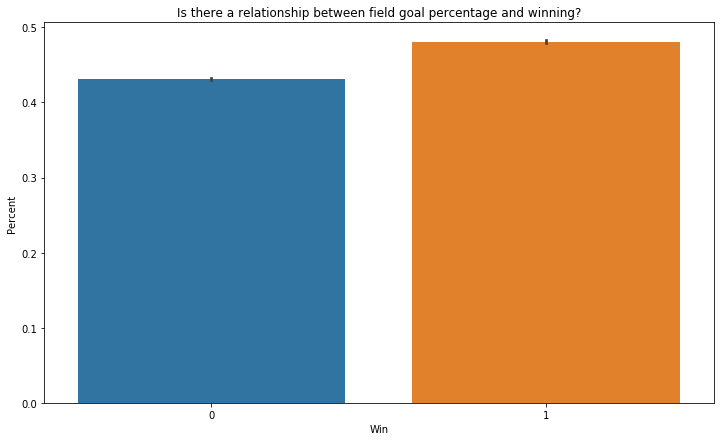

In [120]:
plt.figure(figsize=(12,7))
sns.barplot(x= 'win', y = 'fieldgoal_pct', data = train)
plt.title('Is there a relationship between field goal percentage and winning?')
plt.ylabel('Percent')
plt.xlabel('Win')
plt.show()

In [92]:
alpha = .05

t, p = stats.ttest_ind(win['fieldgoal_pct'], loss['fieldgoal_pct'])

if p < alpha:
    print("We reject the null hypothesis.")
else:
    print("We fail to reject the null hypothesis.")
print(f'The p-value is {p}.')

We reject the null hypothesis
The p-value is 3.841116279171387e-272.


# Does field goals attempted influence a win?
- $H_0$:The average field goal attempted is the same when winning a game.
- $H_a$:The average field goal attempted is not the same when winning a game.
- Alpha = .05

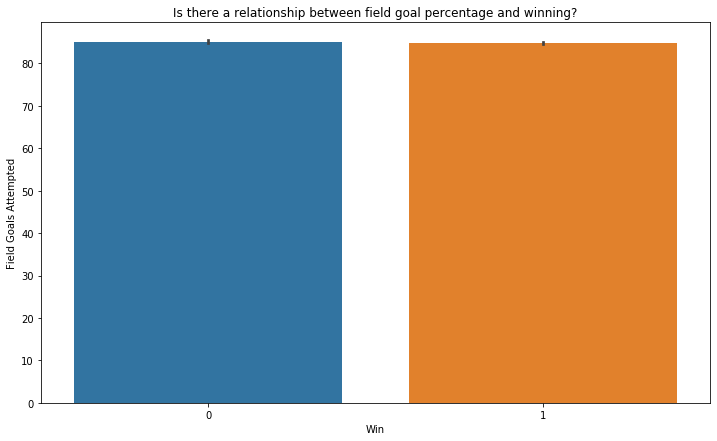

In [119]:
plt.figure(figsize=(12,7))
sns.barplot(x= 'win', y = 'fieldgoalsattempted', data = train)
plt.title('Is there a relationship between field goal percentage and winning?')
plt.ylabel('Field Goals Attempted')
plt.xlabel('Win')
plt.show()

In [96]:
alpha = .05

t, p = stats.ttest_ind(win['fieldgoalsattempted'], loss['fieldgoalsattempted'])

if p < alpha:
    print("We reject the null hypothesis.")
else:
    print("We fail to reject the null hypothesis.")
print(f'The p-value is {p}.')

We fail to reject the null hypothesis
The p-value is 0.07126993128382714.


# Does 3 point shot percentage influence a win?
- $H_0$:The average 3 point shot percentage is the same when winning a game.
- $H_a$:The average 3 point shot percentage is not the same when winning a game.
- Alpha = .05

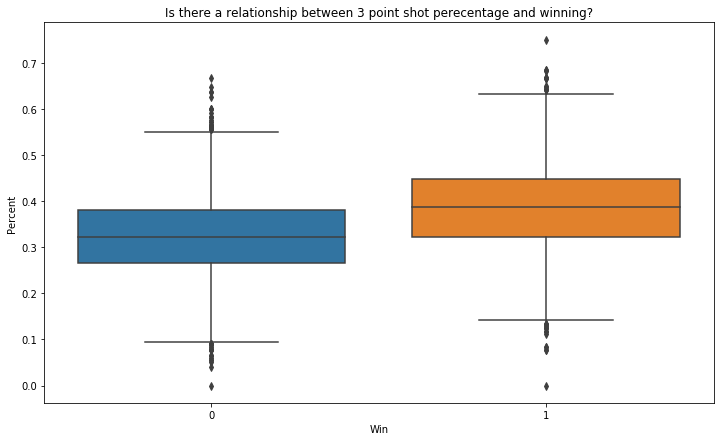

In [117]:
plt.figure(figsize=(12,7))
sns.boxplot(x= 'win', y = 'x3pointshots_pct', data = train)
plt.title('Is there a relationship between 3 point shot perecentage and winning?')
plt.ylabel('Percent')
plt.xlabel('Win')
plt.show()

In [97]:
alpha = .05

t, p = stats.ttest_ind(win['x3pointshots_pct'], loss['x3pointshots_pct'])

if p < alpha:
    print("We reject the null hypothesis.")
else:
    print("We fail to reject the null hypothesis.")
print(f'The p-value is {p}.')

We reject the null hypothesis.
The p-value is 4.263656114768551e-139.


# Does assists influence a win?
- $H_0$:The average assists is the same when winning a game.
- $H_a$:The average assists is not the same when winning a game.
- Alpha = .05

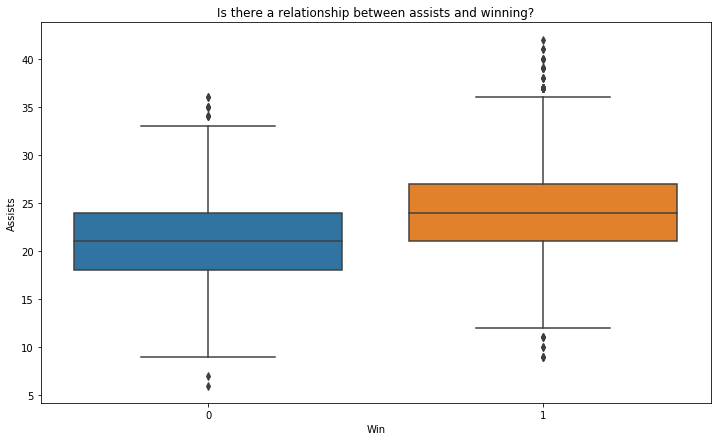

In [116]:
plt.figure(figsize=(12,7))
sns.boxplot(x= 'win', y = 'assists', data = train)
plt.title('Is there a relationship between assists and winning?')
plt.ylabel('Assists')
plt.xlabel('Win')
plt.show()

In [99]:
alpha = .05

t, p = stats.ttest_ind(win['assists'], loss['assists'])

if p < alpha:
    print("We reject the null hypothesis.")
else:
    print("We fail to reject the null hypothesis.")
print(f'The p-value is {p}.')

We reject the null hypothesis.
The p-value is 8.954365130623687e-136.


# Does total rebounds influence a win?
- $H_0$:The average total rebounds is the same when winning a game.
- $H_a$:The average total rebounds is not the same when winning a game.
- Alpha = .05

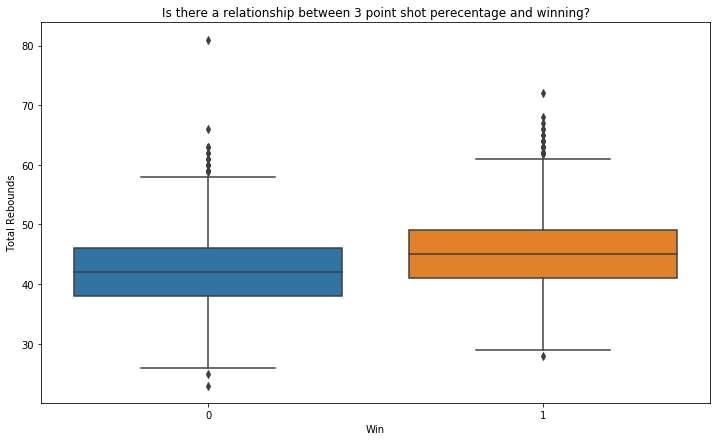

In [113]:
plt.figure(figsize=(12,7))
sns.boxplot(x= 'win', y = 'totalrebounds', data = train)
plt.title('Is there a relationship between 3 point shot perecentage and winning?')
plt.ylabel('Total Rebounds')
plt.xlabel('Win')
plt.show()

In [100]:
alpha = .05

t, p = stats.ttest_ind(win['totalrebounds'], loss['totalrebounds'])

if p < alpha:
    print("We reject the null hypothesis.")
else:
    print("We fail to reject the null hypothesis.")
print(f'The p-value is {p}.')

We reject the null hypothesis.
The p-value is 1.7058686195606687e-86.


# Does having home court influence a win?
- $H_0$:There is no significance in home court when winning a game.
- $H_a$:The is significance in home court when winning a game.
- Alpha = .05

<Figure size 864x504 with 0 Axes>

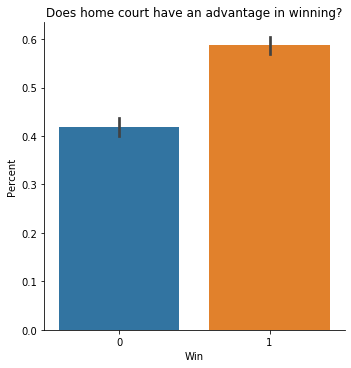

In [122]:
plt.figure(figsize=(12,7))
sns.catplot(x="win", y='is_home', kind="bar", data=train)
plt.title('Does home court have an advantage in winning?')
plt.ylabel('Percent')
plt.xlabel('Win')
plt.show()

In [123]:
alpha = .05
ctab = pd.crosstab(train.win, train.is_home)
ctab

is_home,0,1
win,,
0,1586,1142
1,1149,1633


In [124]:
chi2, p, degf, expected = stats.chi2_contingency(ctab)

if p < alpha:
    print("We reject the null hypothesis.")
else:
    print("We fail to reject the null hypothesis.")
print(f'The p-value is {p}.')


We reject the null hypothesis.
The p-value is 1.0815593274503253e-35.


# Take aways:
    - We were able to reject the null hypothesis on all tests except for field goals attempted. 
    - Suprisingly if a team shoots the ball more regardless if they make it or not, it does not mean you will win more.
    - The averages in rebounds and assist were pretty close whether you win or lose. This may suggest this slight advantage may ifluence a team winning
    - Home court advantage does help influence wins
    - Further testing will be performed (Recursive Feature Elemination & SelectKBest) to see which features will influence a win.

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [14]:
train.columns

Index(['team', 'game', 'date', 'opponent', 'teampoints', 'opponentpoints',
       'fieldgoals', 'fieldgoalsattempted', 'fieldgoal_pct', 'x3pointshots',
       'x3pointshotsattempted', 'x3pointshots_pct', 'freethrows',
       'freethrowsattempted', 'freethrows_pct', 'offrebounds', 'totalrebounds',
       'assists', 'steals', 'blocks', 'turnovers', 'totalfouls',
       'opp.fieldgoals', 'opp.fieldgoalsattempted', 'opp_fieldgoal_pct',
       'opp.3pointshots', 'opp.3pointshotsattempted', 'opp_3pointshots_pct',
       'opp.freethrows', 'opp.freethrowsattempted', 'opp_freethrows_pct',
       'opp.offrebounds', 'opp.totalrebounds', 'opp.assists', 'opp.steals',
       'opp.blocks', 'opp.turnovers', 'opp.totalfouls', 'is_home', 'win'],
      dtype='object')

In [15]:
train.head()

,team,game,date,opponent,teampoints,opponentpoints,fieldgoals,fieldgoalsattempted,fieldgoal_pct,x3pointshots,...,opp_freethrows_pct,opp.offrebounds,opp.totalrebounds,opp.assists,opp.steals,opp.blocks,opp.turnovers,opp.totalfouls,is_home,win
7544,BRK,1,2017-10-18,IND,131,140,45,94,0.479,12,...,0.781,14,47,29,12,9,14,25,0,0
3403,IND,42,2016-01-19,PHO,97,94,34,83,0.410,4,...,0.931,13,53,15,4,2,22,23,0,1
8265,HOU,66,2018-03-11,DAL,105,82,39,84,0.464,17,...,0.611,17,53,27,5,2,10,18,0,1
2225,TOR,12,2014-11-21,MIL,124,82,45,86,0.523,15,...,0.688,8,30,19,11,1,12,18,1,1
5027,BOS,26,2016-12-16,CHO,96,88,34,78,0.436,9,...,0.842,16,53,21,10,4,12,21,1,1


In [16]:
def add_scaled_columns(train, validate, test, scaler, columns_to_scale):
    new_column_names = [c + '_scaled' for c in columns_to_scale]
    scaler.fit(train[columns_to_scale])
    
    train_scaled = pd.DataFrame(scaler.transform(train[columns_to_scale]), 
                            columns=new_column_names, 
                            index=train.index)
    validate_scaled = pd.DataFrame(scaler.transform(validate[columns_to_scale]), 
                            columns=new_column_names, 
                            index=validate.index)
    test_scaled = pd.DataFrame(scaler.transform(test[columns_to_scale]), 
                            columns=new_column_names, 
                            index=test.index)
    return train_scaled, validate_scaled, test_scaled

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [54]:
columns_to_scale = train.drop(columns=['team', 'game', 'date','opponent', 'win', 'teampoints',
       'opponentpoints'])

In [55]:
columns_to_scale.columns

Index(['fieldgoals', 'fieldgoalsattempted', 'fieldgoal_pct', 'x3pointshots',
       'x3pointshotsattempted', 'x3pointshots_pct', 'freethrows',
       'freethrowsattempted', 'freethrows_pct', 'offrebounds', 'totalrebounds',
       'assists', 'steals', 'blocks', 'turnovers', 'totalfouls',
       'opp.fieldgoals', 'opp.fieldgoalsattempted', 'opp_fieldgoal_pct',
       'opp.3pointshots', 'opp.3pointshotsattempted', 'opp_3pointshots_pct',
       'opp.freethrows', 'opp.freethrowsattempted', 'opp_freethrows_pct',
       'opp.offrebounds', 'opp.totalrebounds', 'opp.assists', 'opp.steals',
       'opp.blocks', 'opp.turnovers', 'opp.totalfouls', 'is_home'],
      dtype='object')

In [56]:
columns_to_scale = (['fieldgoals', 'fieldgoalsattempted', 'fieldgoal_pct', 'x3pointshots',
       'x3pointshotsattempted', 'x3pointshots_pct', 'freethrows',
       'freethrowsattempted', 'freethrows_pct', 'offrebounds', 'totalrebounds',
       'assists', 'steals', 'blocks', 'turnovers', 'totalfouls',
       'opp.fieldgoals', 'opp.fieldgoalsattempted', 'opp_fieldgoal_pct',
       'opp.3pointshots', 'opp.3pointshotsattempted', 'opp_3pointshots_pct',
       'opp.freethrows', 'opp.freethrowsattempted', 'opp_freethrows_pct',
       'opp.offrebounds', 'opp.totalrebounds', 'opp.assists', 'opp.steals',
       'opp.blocks', 'opp.turnovers', 'opp.totalfouls', 'is_home'])

In [57]:
train_scaled, validate_scaled, test_scaled = add_scaled_columns(train,validate,test, MinMaxScaler(),columns_to_scale)

In [58]:
train_scaled.head()

,fieldgoals_scaled,fieldgoalsattempted_scaled,fieldgoal_pct_scaled,x3pointshots_scaled,x3pointshotsattempted_scaled,x3pointshots_pct_scaled,freethrows_scaled,freethrowsattempted_scaled,freethrows_pct_scaled,offrebounds_scaled,...,opp.freethrowsattempted_scaled,opp_freethrows_pct_scaled,opp.offrebounds_scaled,opp.totalrebounds_scaled,opp.assists_scaled,opp.steals_scaled,opp.blocks_scaled,opp.turnovers_scaled,opp.totalfouls_scaled,is_home_scaled
7544,0.657895,0.492754,0.490050,0.48,0.456140,0.533333,0.666667,0.483871,0.890315,0.289474,...,0.517857,0.744457,0.518519,0.519231,0.55,0.60,0.529412,0.444444,0.514286,0.0
3403,0.368421,0.333333,0.318408,0.16,0.280702,0.266667,0.571429,0.516129,0.690782,0.263158,...,0.464286,0.919487,0.481481,0.634615,0.20,0.20,0.117647,0.740741,0.457143,0.0
8265,0.500000,0.347826,0.452736,0.68,0.719298,0.504000,0.214286,0.193548,0.666278,0.157895,...,0.267857,0.546091,0.629630,0.634615,0.50,0.25,0.117647,0.296296,0.314286,0.0
2225,0.657895,0.376812,0.599502,0.60,0.368421,0.800000,0.428571,0.354839,0.757293,0.394737,...,0.517857,0.635939,0.296296,0.192308,0.30,0.55,0.058824,0.370370,0.314286,1.0
5027,0.368421,0.260870,0.383085,0.36,0.421053,0.428000,0.428571,0.387097,0.686114,0.131579,...,0.285714,0.815636,0.592593,0.634615,0.35,0.50,0.235294,0.370370,0.400000,1.0


In [69]:
train.head()

,team,game,date,opponent,teampoints,opponentpoints,fieldgoals,fieldgoalsattempted,fieldgoal_pct,x3pointshots,...,opp_freethrows_pct,opp.offrebounds,opp.totalrebounds,opp.assists,opp.steals,opp.blocks,opp.turnovers,opp.totalfouls,is_home,win
7544,BRK,1,2017-10-18,IND,131,140,45,94,0.479,12,...,0.781,14,47,29,12,9,14,25,0,0
3403,IND,42,2016-01-19,PHO,97,94,34,83,0.410,4,...,0.931,13,53,15,4,2,22,23,0,1
8265,HOU,66,2018-03-11,DAL,105,82,39,84,0.464,17,...,0.611,17,53,27,5,2,10,18,0,1
2225,TOR,12,2014-11-21,MIL,124,82,45,86,0.523,15,...,0.688,8,30,19,11,1,12,18,1,1
5027,BOS,26,2016-12-16,CHO,96,88,34,78,0.436,9,...,0.842,16,53,21,10,4,12,21,1,1


In [63]:
y_train = train['win']

In [64]:
y_train

7544    0
3403    1
8265    1
2225    1
5027    1
       ..
4159    1
898     0
1584    0
2751    0
8130    1
Name: win, Length: 5510, dtype: uint8

In [70]:
def rfe_ranker(train):
    '''
    Uses Recursive Feature Elimination (RFE) to rank the given features in order of their usefulness in
    predicting a win with a linear regression model.
    '''
    # creating linear regression object
    lm = LinearRegression()

    # fitting linear regression model to features 
    lm.fit(train_scaled, y_train)

    # creating recursive feature elimination object and specifying to rank 5 of the best features
    rfe = RFE(lm, 5)

    # using rfe object to transform features 
    x_rfe = rfe.fit_transform(train_scaled, y_train)

    feature_mask = rfe.support_

    # creating train df for rfe object 
    rfe_train = train_scaled

    # creating list of the top features per rfe
    rfe_features = rfe_train.loc[:,feature_mask].columns.tolist()

    # creating ranked list 
    feature_ranks = rfe.ranking_

    # creating list of feature names
    feature_names = rfe_train.columns.tolist()

    # create df that contains all features and their ranks
    rfe_ranks_df = pd.DataFrame({'Feature': feature_names, 'Rank': feature_ranks})

    # return df sorted by rank
    return rfe_ranks_df.sort_values('Rank')

In [79]:
rfe_ranker(train_scaled).head(10)


,Feature,Rank
0,fieldgoals_scaled,1
22,opp.freethrows_scaled,1
6,freethrows_scaled,1
16,opp.fieldgoals_scaled,1
3,x3pointshots_scaled,1
19,opp.3pointshots_scaled,2
31,opp.totalfouls_scaled,3
15,totalfouls_scaled,4
18,opp_fieldgoal_pct_scaled,5
2,fieldgoal_pct_scaled,6


In [74]:
from sklearn.feature_selection import SelectKBest, f_regression

In [75]:
def select_kbest(train_scaled, y_train, k):
    '''
    Takes in the predictors (train_scaled), the target (y_train), the number of features to select (k) 
    and returns the names of the top k selected features
    '''
    f_selector = SelectKBest(f_regression, k)
    f_selector = f_selector.fit(train_scaled, y_train)
    X_train_reduced = f_selector.transform(train_scaled)
    f_support = f_selector.get_support()
    f_feature = train_scaled.iloc[:,f_support].columns.tolist()
    return f_feature

In [76]:
f_feature = select_kbest(train_scaled, y_train, k=5)

In [77]:
f_feature

['fieldgoals_scaled',
 'fieldgoal_pct_scaled',
 'x3pointshots_pct_scaled',
 'opp.fieldgoals_scaled',
 'opp_fieldgoal_pct_scaled']

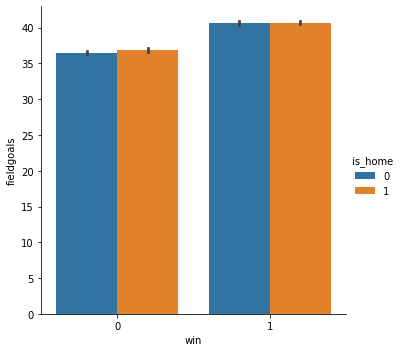